In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [2]:
import pandas as pd
import numpy as np
import scipy.stats as spst
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline
rc('font', family='NanumBarunGothic')

plt.rcParams['axes.unicode_minus'] = False

### 포지션별에 따라 어깨 관절에서 발생한 부상 횟수에 차이가 있다

In [ ]:
new = pd.read_excel('/content/drive/MyDrive/Pitch_Injury/data/new.xlsx')
new

,NAME,TEAM,POS,Injury/Surgery Date,Injury/Surgery,Status,IL Retro Date,Eligible to Return,Return Date,Latest Update
0,Cooper Criswell,LAA,SP,Mar '22,Shoulder soreness,Activated,2004-04-22 00:00:00,2006-03-22 00:00:00,07/15/22,Activated
1,Taylor Ward,LAA,OF,2004-05-22 00:00:00,Strained groin,Activated,2004-06-22 00:00:00,04/16/22,04/16/22,Activated
2,José Quijada,LAA,RP,2004-09-22 00:00:00,Strained oblique,Activated,2004-08-22 00:00:00,04/18/22,05/29/22,Activated
3,David Fletcher,LAA,INF,2004-11-22 00:00:00,Strained hip,Activated,2004-12-22 00:00:00,04/22/22,04/29/22,Activated
4,Archie Bradley,LAA,RP,04/29/22,Strained abdominal,Activated,04/30/22,2005-10-22 00:00:00,05/23/22,Activated
...,...,...,...,...,...,...,...,...,...,...
1397,Alex Wood,SFG,SP,05/31/23,Strained lower back,15-Day IL,2006-01-23 00:00:00,06/16/23,NaN,Expected to return when eligible or soon there...
1398,Luis González,SFG,OF,03/14/23,Back surgery (herniated disc),60-Day IL,03/27/23,05/26/23,NaN,Expected to miss 4 months
1399,Roberto Pérez,SFG,C,2004-12-23 00:00:00,Shoulder surgery (rotator cuff),60-Day IL,2004-08-23 00:00:00,2006-07-23 00:00:00,NaN,Out for 2023 season
1400,Heliot Ramos,SFG,OF,2005-05-23 00:00:00,Strained oblique,60-Day IL,05/19/23,07/18/23,NaN,No timetable for return


In [ ]:

new.isnull().sum()

NAME                     0
TEAM                     0
POS                      0
Injury/Surgery Date      0
Injury/Surgery           0
Status                   0
IL Retro Date            0
Eligible to Return       0
Return Date            238
Latest Update            0
dtype: int64

In [ ]:
new['POS'].unique()

array(['SP', 'OF', 'RP', 'INF', 'C', 'INF/OF', '3B', 'SP/RP', '1B', 'SS',
       'OF/INF', '2B', 'C/OF', 'OF/1B', '1B/OF', 'C/1B', '3B/1B', '3B/OF',
       'DH'], dtype=object)

In [ ]:
new['Injury/Surgery'].unique()

array(['Shoulder soreness', 'Strained groin', 'Strained oblique',
       'Strained hip', 'Strained abdominal', 'Undisclosed',
       'Adductor surgery (hip/groin)', 'Nasal fracture surgery',
       'Wrist inflammation', 'Strained hamstring', 'Strained triceps',
       'Wrist surgery', 'Shoulder impingement', 'Fractured elbow (right)',
       'Lower back spasms', 'Strained shoulder', 'Ribcage inflammation',
       'Fractured finger (right middle)', 'Hand contusion',
       'Strained forearm', 'Shoulder surgery', 'Back discomfort', 'TBD',
       'Thoracic outlet syndrome surgery', 'Torn knee meniscus',
       'Strained elbow', 'Elbow inflammation', 'Elbow contusion',
       'Shoulder inflammation', 'Fractured finger (right)',
       'Sprained knee', 'Knee discomfort', 'Tommy John surgery',
       'Arthroscopic shoulder surgery', 'Stress fracture -- rib cage',
       'COVID-19', 'Intercostal irritation', 'Back spasms',
       'Strained hip flexor', 'Hip inflammation',
       'Lower back i

In [ ]:
temp = new.loc[new['Injury/Surgery'].notnull()]

In [ ]:
temp[temp['Injury/Surgery'].str.contains('Shoulder')]['Injury/Surgery'].unique()

array(['Shoulder soreness', 'Shoulder impingement', 'Shoulder surgery',
       'Shoulder inflammation', 'Shoulder surgery (torn labrum)',
       'Shoulder subluxation', 'Shoulder tendinitis',
       'Shoulder discomfort', 'Shoulder impingement syndrome',
       'Shoulder fatigue', 'Shoulder dislocation (non-throwing)',
       'Shoulder inflammation (scapula)', 'Shoulder contusion',
       'Shoulder surgery (fractured clavicle)',
       'Shoulder surgery (left rotator cuff)',
       'Shoulder dislocation (left)', 'Shoulder tightness',
       'Shoulder bursitis', 'Shoulder soreness (frayed labrum)',
       'Shoulder tendinopathy', 'Shoulder surgery (aneurysm)',
       'Shoulder surgery (frayed labrum)',
       'Shoulder surgery (labrum/rotator cuff repair)',
       'Shoulder surgery (labrum/rotator cuff cleanup)',
       'Shoulder tendinitis (rotator cuff)',
       'Shoulder surgery (rotator cuff)'], dtype=object)

In [ ]:
temp[temp['Injury/Surgery'].str.contains('shoulder')]['Injury/Surgery'].unique()

array(['Strained shoulder', 'Arthroscopic shoulder surgery',
       'Strained shoulder (teres major)', 'Sprained shoulder',
       'Strained shoulder (capsular tear)', 'Stress fracture -- shoulder',
       'Stress reaction -- shoulder',
       'Strained lat/Torn shoulder capsule', 'Dislocated shoulder',
       'Strained shoulder (deltoid)'], dtype=object)

In [ ]:
temp.loc[temp['Injury/Surgery'].str.contains('Shoulder'), 'count'] = 1
temp.loc[temp['Injury/Surgery'].str.contains('shoulder'), 'count'] = 1

In [ ]:
temp.loc[~temp['Injury/Surgery'].isin(['Shoulder soreness', 'Shoulder impingement', 'Shoulder surgery',
       'Shoulder inflammation', 'Shoulder surgery (torn labrum)',
       'Shoulder subluxation', 'Shoulder tendinitis',
       'Shoulder discomfort', 'Shoulder impingement syndrome',
       'Shoulder fatigue', 'Shoulder dislocation (non-throwing)',
       'Shoulder inflammation (scapula)', 'Shoulder contusion',
       'Shoulder surgery (fractured clavicle)',
       'Shoulder surgery (left rotator cuff)',
       'Shoulder dislocation (left)', 'Shoulder tightness',
       'Shoulder bursitis', 'Shoulder soreness (frayed labrum)',
       'Shoulder tendinopathy', 'Shoulder surgery (aneurysm)',
       'Shoulder surgery (frayed labrum)',
       'Shoulder surgery (labrum/rotator cuff repair)',
       'Shoulder surgery (labrum/rotator cuff cleanup)',
       'Shoulder tendinitis (rotator cuff)',
       'Shoulder surgery (rotator cuff)',
       'Strained shoulder', 'Arthroscopic shoulder surgery',
       'Strained shoulder (teres major)', 'Sprained shoulder',
       'Strained shoulder (capsular tear)', 'Stress fracture -- shoulder',
       'Stress reaction -- shoulder',
       'Strained lat/Torn shoulder capsule', 'Dislocated shoulder',
       'Strained shoulder (deltoid)']), 'count'] = 0

In [ ]:
temp

,NAME,TEAM,POS,Injury/Surgery Date,Injury/Surgery,Status,IL Retro Date,Eligible to Return,Return Date,Latest Update,count
0,Cooper Criswell,LAA,SP,Mar '22,Shoulder soreness,Activated,2004-04-22 00:00:00,2006-03-22 00:00:00,07/15/22,Activated,1.0
1,Taylor Ward,LAA,OF,2004-05-22 00:00:00,Strained groin,Activated,2004-06-22 00:00:00,04/16/22,04/16/22,Activated,0.0
2,José Quijada,LAA,RP,2004-09-22 00:00:00,Strained oblique,Activated,2004-08-22 00:00:00,04/18/22,05/29/22,Activated,0.0
3,David Fletcher,LAA,INF,2004-11-22 00:00:00,Strained hip,Activated,2004-12-22 00:00:00,04/22/22,04/29/22,Activated,0.0
4,Archie Bradley,LAA,RP,04/29/22,Strained abdominal,Activated,04/30/22,2005-10-22 00:00:00,05/23/22,Activated,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1397,Alex Wood,SFG,SP,05/31/23,Strained lower back,15-Day IL,2006-01-23 00:00:00,06/16/23,NaN,Expected to return when eligible or soon there...,0.0
1398,Luis González,SFG,OF,03/14/23,Back surgery (herniated disc),60-Day IL,03/27/23,05/26/23,NaN,Expected to miss 4 months,0.0
1399,Roberto Pérez,SFG,C,2004-12-23 00:00:00,Shoulder surgery (rotator cuff),60-Day IL,2004-08-23 00:00:00,2006-07-23 00:00:00,NaN,Out for 2023 season,1.0
1400,Heliot Ramos,SFG,OF,2005-05-23 00:00:00,Strained oblique,60-Day IL,05/19/23,07/18/23,NaN,No timetable for return,0.0


In [ ]:
A_1 = temp.loc[temp['POS'].isin(['SP', 'RP', 'SP/RP']), 'count']
A_2 = temp.loc[temp['POS'] == 'OF', 'count']
A_3 = temp.loc[temp['POS'] == 'INF', 'count']
A_4 = temp.loc[temp['POS'] == 'C', 'count']
A_5 = temp.loc[temp['POS'] == 'INF/OF', 'count']
A_6 = temp.loc[temp['POS'] == '3B', 'count']
A_7 = temp.loc[temp['POS'] == '1B', 'count']
A_8 = temp.loc[temp['POS'] == 'SS', 'count']
A_9 = temp.loc[temp['POS'] == 'OF/INF', 'count']
A_10 = temp.loc[temp['POS'] == '2B', 'count']
A_11 = temp.loc[temp['POS'] == 'C/OF', 'count']
A_12 = temp.loc[temp['POS'] == 'OF/1B', 'count']
A_13 = temp.loc[temp['POS'] == '1B/OF', 'count']
A_14 = temp.loc[temp['POS'] == 'C/1B', 'count']
A_15 = temp.loc[temp['POS'] == '3B/1B', 'count']
A_16 = temp.loc[temp['POS'] == '3B/OF', 'count']
A_17 = temp.loc[temp['POS'] == 'DH', 'count']

In [ ]:
spst.f_oneway(A_1, A_2, A_3, A_4, A_5, A_6, A_7, A_8, A_9, A_10, A_11, A_12, A_13, A_14, A_15, A_16, A_17)

F_onewayResult(statistic=3.32696395645334, pvalue=9.10450669106653e-06)

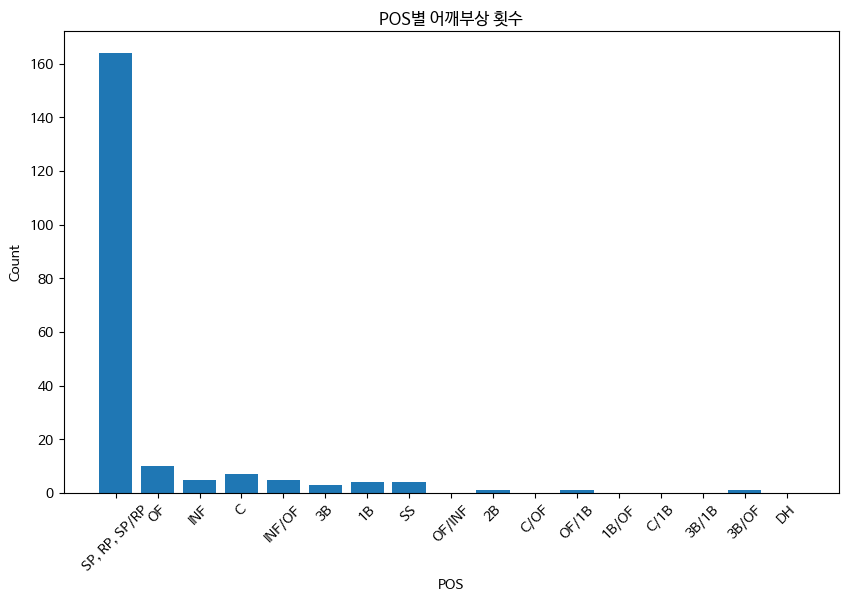

In [ ]:
# POS 종류
pos_labels = ['SP, RP, SP/RP', 'OF', 'INF', 'C', 'INF/OF', '3B', '1B', 'SS', 'OF/INF',
              '2B', 'C/OF', 'OF/1B', '1B/OF', 'C/1B', '3B/1B', '3B/OF', 'DH']

# Count 값 추출
count_values = [temp.loc[temp['POS'].isin(['SP', 'RP', 'SP/RP']), 'count'].sum(),
               temp.loc[temp['POS'] == 'OF', 'count'].sum(),
               temp.loc[temp['POS'] == 'INF', 'count'].sum(),
               temp.loc[temp['POS'] == 'C', 'count'].sum(),
               temp.loc[temp['POS'] == 'INF/OF', 'count'].sum(),
               temp.loc[temp['POS'] == '3B', 'count'].sum(),
               temp.loc[temp['POS'] == '1B', 'count'].sum(),
               temp.loc[temp['POS'] == 'SS', 'count'].sum(),
               temp.loc[temp['POS'] == 'OF/INF', 'count'].sum(),
               temp.loc[temp['POS'] == '2B', 'count'].sum(),
               temp.loc[temp['POS'] == 'C/OF', 'count'].sum(),
               temp.loc[temp['POS'] == 'OF/1B', 'count'].sum(),
               temp.loc[temp['POS'] == '1B/OF', 'count'].sum(),
               temp.loc[temp['POS'] == 'C/1B', 'count'].sum(),
               temp.loc[temp['POS'] == '3B/1B', 'count'].sum(),
               temp.loc[temp['POS'] == '3B/OF', 'count'].sum(),
               temp.loc[temp['POS'] == 'DH', 'count'].sum()]

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(pos_labels, count_values)
plt.xlabel('POS')
plt.ylabel('Count')
plt.title('POS별 어깨부상 횟수')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# B_1 = temp.loc[temp['POS'] == 'SP', 'count']
# B_2 = temp.loc[temp['POS'] == 'OF', 'count']
# B_3 = temp.loc[temp['POS'] == 'INF', 'count']
# B_4 = temp.loc[temp['POS'] == 'C', 'count']
# B_5 = temp.loc[temp['POS'] == 'INF/OF', 'count']
# B_6 = temp.loc[temp['POS'] == '3B', 'count']
# B_7 = temp.loc[temp['POS'] == '1B', 'count']
# B_8 = temp.loc[temp['POS'] == 'SS', 'count']
# B_9 = temp.loc[temp['POS'] == 'OF/INF', 'count']
# B_10 = temp.loc[temp['POS'] == '2B', 'count']
# B_11 = temp.loc[temp['POS'] == 'C/OF', 'count']
# B_12 = temp.loc[temp['POS'] == 'OF/1B', 'count']
# B_13 = temp.loc[temp['POS'] == '1B/OF', 'count']
# B_14 = temp.loc[temp['POS'] == 'C/1B', 'count']
# B_15 = temp.loc[temp['POS'] == '3B/1B', 'count']
# B_16 = temp.loc[temp['POS'] == '3B/OF', 'count']
# B_17 = temp.loc[temp['POS'] == 'DH', 'count']
# B_18 = temp.loc[temp['POS'] == 'RP', 'count']
# B_19 = temp.loc[temp['POS'] == 'SP/RP', 'count']

In [ ]:
# spst.f_oneway(B_1, B_2, B_3, B_4, B_5, B_6, B_7, B_8, B_9, B_10, B_11, B_12, B_13, B_14, B_15, B_16, B_17, B_18, B_19)

In [ ]:
# # POS 종류
# pos_labels = ['SP', 'OF', 'INF', 'C', 'INF/OF', '3B', '1B', 'SS', 'OF/INF',
#               '2B', 'C/OF', 'OF/1B', '1B/OF', 'C/1B', '3B/1B', '3B/OF', 'DH', 'RP', 'SP/RP']

# # Count 값 추출
# count_values = [temp.loc[temp['POS'] == 'SP', 'count'].sum(),
#                 temp.loc[temp['POS'] == 'OF', 'count'].sum(),
#                 temp.loc[temp['POS'] == 'INF', 'count'].sum(),
#                 temp.loc[temp['POS'] == 'C', 'count'].sum(),
#                 temp.loc[temp['POS'] == 'INF/OF', 'count'].sum(),
#                 temp.loc[temp['POS'] == '3B', 'count'].sum(),
#                 temp.loc[temp['POS'] == '1B', 'count'].sum(),
#                 temp.loc[temp['POS'] == 'SS', 'count'].sum(),
#                 temp.loc[temp['POS'] == 'OF/INF', 'count'].sum(),
#                 temp.loc[temp['POS'] == '2B', 'count'].sum(),
#                 temp.loc[temp['POS'] == 'C/OF', 'count'].sum(),
#                 temp.loc[temp['POS'] == 'OF/1B', 'count'].sum(),
#                 temp.loc[temp['POS'] == '1B/OF', 'count'].sum(),
#                 temp.loc[temp['POS'] == 'C/1B', 'count'].sum(),
#                 temp.loc[temp['POS'] == '3B/1B', 'count'].sum(),
#                 temp.loc[temp['POS'] == '3B/OF', 'count'].sum(),
#                 temp.loc[temp['POS'] == 'DH', 'count'].sum(),
#                 temp.loc[temp['POS'] == 'RP', 'count'].sum(),
#                 temp.loc[temp['POS'] == 'SP/RP', 'count'].sum()]

# # 그래프 그리기
# plt.figure(figsize=(10, 6))
# plt.bar(pos_labels, count_values)
# plt.xlabel('POS')
# plt.ylabel('Count')
# plt.title('POS별 어깨부상횟수')
# plt.xticks(rotation=45)
# plt.show()

### 포지션별에 따라 팔꿈치에서 발생한 부상 횟수에 차이가 있다

In [ ]:
temp.loc[temp['Injury/Surgery'].str.contains('elbow'), 'count'] = 1
temp.loc[temp['Injury/Surgery'].str.contains('Elbow'), 'count'] = 1
temp.loc[temp['Injury/Surgery'].str.contains('Tommy John'), 'count'] = 1

In [ ]:
temp[temp['Injury/Surgery'].str.contains('elbow')]['Injury/Surgery'].unique()

array(['Fractured elbow (right)', 'Strained elbow', 'Sprained elbow',
       'Olecranon stress fracture (right elbow)', 'Fractured elbow',
       'Arthroscopic elbow surgery',
       'Blood clot removal surgery (right elbow)',
       'Arthoscopic elbow surgery', 'Stress reaction -- elbow',
       'Strained elbow flexor', 'Bone chip in elbow'], dtype=object)

In [ ]:
temp[temp['Injury/Surgery'].str.contains('Elbow')]['Injury/Surgery'].unique()

array(['Elbow inflammation', 'Elbow contusion', 'Elbow discomfort',
       'Elbow debridement surgery', 'Elbow surgery (fracture)',
       'Elbow tendinitis', 'Elbow discomfort (loose bodies)',
       'Elbow soreness', 'Elbow/back soreness', 'Elbow surgery',
       'Elbow discomfort (lateral epicondylitis)',
       'Elbow inflammation (left)', 'Elbow tightness', 'Elbow effusion',
       'Elbow surgery (internal brace procedure)',
       'Elbow stress reaction', 'Elbow discomfort (ulnar neuritis)',
       'Elbow surgery (internal brace)',
       'Elbow surgery (ulnar nerve transposition)',
       'Elbow discomfort (ulnar nerve entrapment)',
       'Elbow valgus extension overload',
       'Elbow surgery (bone chip removal)', 'Elbow nerve irritation'],
      dtype=object)

In [ ]:
temp[temp['Injury/Surgery'].str.contains('Tommy John')]['Injury/Surgery'].unique()

array(['Tommy John surgery'], dtype=object)

In [ ]:
temp.loc[~temp['Injury/Surgery'].isin(['Fractured elbow (right)', 'Strained elbow', 'Sprained elbow',
       'Olecranon stress fracture (right elbow)', 'Fractured elbow',
       'Arthroscopic elbow surgery',
       'Blood clot removal surgery (right elbow)',
       'Arthoscopic elbow surgery', 'Stress reaction -- elbow',
       'Strained elbow flexor', 'Bone chip in elbow','Elbow inflammation', 'Elbow contusion', 'Elbow discomfort',
       'Elbow debridement surgery', 'Elbow surgery (fracture)',
       'Elbow tendinitis', 'Elbow discomfort (loose bodies)',
       'Elbow soreness', 'Elbow/back soreness', 'Elbow surgery',
       'Elbow discomfort (lateral epicondylitis)',
       'Elbow inflammation (left)', 'Elbow tightness', 'Elbow effusion',
       'Elbow surgery (internal brace procedure)',
       'Elbow stress reaction', 'Elbow discomfort (ulnar neuritis)',
       'Elbow surgery (internal brace)',
       'Elbow surgery (ulnar nerve transposition)',
       'Elbow discomfort (ulnar nerve entrapment)',
       'Elbow valgus extension overload',
       'Elbow surgery (bone chip removal)', 'Elbow nerve irritation']), 'count'] = 0

In [ ]:
temp

,NAME,TEAM,POS,Injury/Surgery Date,Injury/Surgery,Status,IL Retro Date,Eligible to Return,Return Date,Latest Update,count
0,Cooper Criswell,LAA,SP,Mar '22,Shoulder soreness,Activated,2004-04-22 00:00:00,2006-03-22 00:00:00,07/15/22,Activated,0.0
1,Taylor Ward,LAA,OF,2004-05-22 00:00:00,Strained groin,Activated,2004-06-22 00:00:00,04/16/22,04/16/22,Activated,0.0
2,José Quijada,LAA,RP,2004-09-22 00:00:00,Strained oblique,Activated,2004-08-22 00:00:00,04/18/22,05/29/22,Activated,0.0
3,David Fletcher,LAA,INF,2004-11-22 00:00:00,Strained hip,Activated,2004-12-22 00:00:00,04/22/22,04/29/22,Activated,0.0
4,Archie Bradley,LAA,RP,04/29/22,Strained abdominal,Activated,04/30/22,2005-10-22 00:00:00,05/23/22,Activated,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1397,Alex Wood,SFG,SP,05/31/23,Strained lower back,15-Day IL,2006-01-23 00:00:00,06/16/23,NaN,Expected to return when eligible or soon there...,0.0
1398,Luis González,SFG,OF,03/14/23,Back surgery (herniated disc),60-Day IL,03/27/23,05/26/23,NaN,Expected to miss 4 months,0.0
1399,Roberto Pérez,SFG,C,2004-12-23 00:00:00,Shoulder surgery (rotator cuff),60-Day IL,2004-08-23 00:00:00,2006-07-23 00:00:00,NaN,Out for 2023 season,0.0
1400,Heliot Ramos,SFG,OF,2005-05-23 00:00:00,Strained oblique,60-Day IL,05/19/23,07/18/23,NaN,No timetable for return,0.0


In [ ]:
A_1 = temp.loc[temp['POS'].isin(['SP', 'RP', 'SP/RP']), 'count']
A_2 = temp.loc[temp['POS'] == 'OF', 'count']
A_3 = temp.loc[temp['POS'] == 'INF', 'count']
A_4 = temp.loc[temp['POS'] == 'C', 'count']
A_5 = temp.loc[temp['POS'] == 'INF/OF', 'count']
A_6 = temp.loc[temp['POS'] == '3B', 'count']
A_7 = temp.loc[temp['POS'] == '1B', 'count']
A_8 = temp.loc[temp['POS'] == 'SS', 'count']
A_9 = temp.loc[temp['POS'] == 'OF/INF', 'count']
A_10 = temp.loc[temp['POS'] == '2B', 'count']
A_11 = temp.loc[temp['POS'] == 'C/OF', 'count']
A_12 = temp.loc[temp['POS'] == 'OF/1B', 'count']
A_13 = temp.loc[temp['POS'] == '1B/OF', 'count']
A_14 = temp.loc[temp['POS'] == 'C/1B', 'count']
A_15 = temp.loc[temp['POS'] == '3B/1B', 'count']
A_16 = temp.loc[temp['POS'] == '3B/OF', 'count']
A_17 = temp.loc[temp['POS'] == 'DH', 'count']

In [ ]:
spst.f_oneway(A_1, A_2, A_3, A_4, A_5, A_6, A_7, A_8, A_9, A_10, A_11, A_12, A_13, A_14, A_15, A_16, A_17)

F_onewayResult(statistic=2.9739147906156793, pvalue=6.763657871035487e-05)

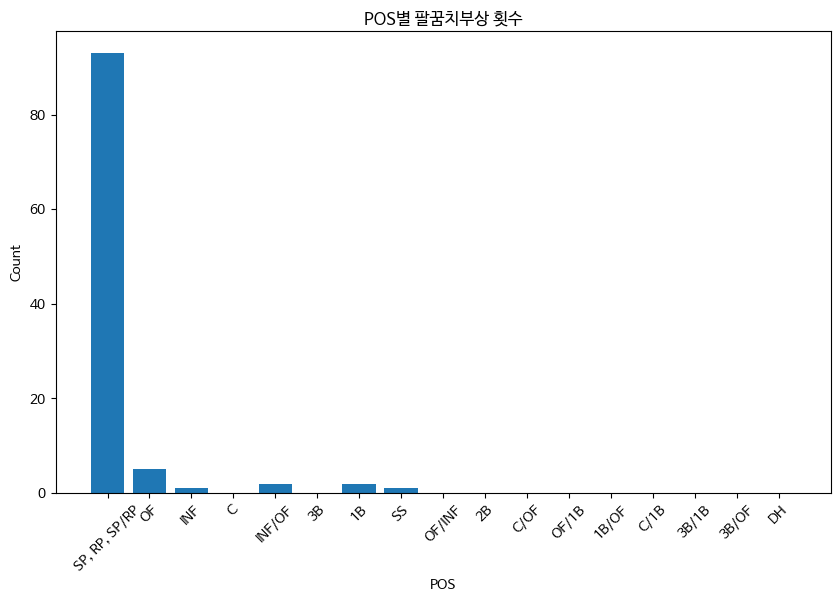

In [ ]:
# POS 종류
pos_labels = ['SP, RP, SP/RP', 'OF', 'INF', 'C', 'INF/OF', '3B', '1B', 'SS', 'OF/INF',
              '2B', 'C/OF', 'OF/1B', '1B/OF', 'C/1B', '3B/1B', '3B/OF', 'DH']

# Count 값 추출
count_values = [temp.loc[temp['POS'].isin(['SP', 'RP', 'SP/RP']), 'count'].sum(),
               temp.loc[temp['POS'] == 'OF', 'count'].sum(),
               temp.loc[temp['POS'] == 'INF', 'count'].sum(),
               temp.loc[temp['POS'] == 'C', 'count'].sum(),
               temp.loc[temp['POS'] == 'INF/OF', 'count'].sum(),
               temp.loc[temp['POS'] == '3B', 'count'].sum(),
               temp.loc[temp['POS'] == '1B', 'count'].sum(),
               temp.loc[temp['POS'] == 'SS', 'count'].sum(),
               temp.loc[temp['POS'] == 'OF/INF', 'count'].sum(),
               temp.loc[temp['POS'] == '2B', 'count'].sum(),
               temp.loc[temp['POS'] == 'C/OF', 'count'].sum(),
               temp.loc[temp['POS'] == 'OF/1B', 'count'].sum(),
               temp.loc[temp['POS'] == '1B/OF', 'count'].sum(),
               temp.loc[temp['POS'] == 'C/1B', 'count'].sum(),
               temp.loc[temp['POS'] == '3B/1B', 'count'].sum(),
               temp.loc[temp['POS'] == '3B/OF', 'count'].sum(),
               temp.loc[temp['POS'] == 'DH', 'count'].sum()]

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(pos_labels, count_values)
plt.xlabel('POS')
plt.ylabel('Count')
plt.title('POS별 팔꿈치부상 횟수')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# B_1 = temp.loc[temp['POS'] == 'SP', 'count']
# B_2 = temp.loc[temp['POS'] == 'OF', 'count']
# B_3 = temp.loc[temp['POS'] == 'INF', 'count']
# B_4 = temp.loc[temp['POS'] == 'C', 'count']
# B_5 = temp.loc[temp['POS'] == 'INF/OF', 'count']
# B_6 = temp.loc[temp['POS'] == '3B', 'count']
# B_7 = temp.loc[temp['POS'] == '1B', 'count']
# B_8 = temp.loc[temp['POS'] == 'SS', 'count']
# B_9 = temp.loc[temp['POS'] == 'OF/INF', 'count']
# B_10 = temp.loc[temp['POS'] == '2B', 'count']
# B_11 = temp.loc[temp['POS'] == 'C/OF', 'count']
# B_12 = temp.loc[temp['POS'] == 'OF/1B', 'count']
# B_13 = temp.loc[temp['POS'] == '1B/OF', 'count']
# B_14 = temp.loc[temp['POS'] == 'C/1B', 'count']
# B_15 = temp.loc[temp['POS'] == '3B/1B', 'count']
# B_16 = temp.loc[temp['POS'] == '3B/OF', 'count']
# B_17 = temp.loc[temp['POS'] == 'DH', 'count']
# B_18 = temp.loc[temp['POS'] == 'RP', 'count']
# B_19 = temp.loc[temp['POS'] == 'SP/RP', 'count']

In [ ]:
# spst.f_oneway(B_1, B_2, B_3, B_4, B_5, B_6, B_7, B_8, B_9, B_10, B_11, B_12, B_13, B_14, B_15, B_16, B_17, B_18, B_19)

In [ ]:
# # POS 종류
# pos_labels = ['SP', 'OF', 'INF', 'C', 'INF/OF', '3B', '1B', 'SS', 'OF/INF',
#               '2B', 'C/OF', 'OF/1B', '1B/OF', 'C/1B', '3B/1B', '3B/OF', 'DH', 'RP', 'SP/RP']

# # Count 값 추출
# count_values = [temp.loc[temp['POS'] == 'SP', 'count'].sum(),
#                 temp.loc[temp['POS'] == 'OF', 'count'].sum(),
#                 temp.loc[temp['POS'] == 'INF', 'count'].sum(),
#                 temp.loc[temp['POS'] == 'C', 'count'].sum(),
#                 temp.loc[temp['POS'] == 'INF/OF', 'count'].sum(),
#                 temp.loc[temp['POS'] == '3B', 'count'].sum(),
#                 temp.loc[temp['POS'] == '1B', 'count'].sum(),
#                 temp.loc[temp['POS'] == 'SS', 'count'].sum(),
#                 temp.loc[temp['POS'] == 'OF/INF', 'count'].sum(),
#                 temp.loc[temp['POS'] == '2B', 'count'].sum(),
#                 temp.loc[temp['POS'] == 'C/OF', 'count'].sum(),
#                 temp.loc[temp['POS'] == 'OF/1B', 'count'].sum(),
#                 temp.loc[temp['POS'] == '1B/OF', 'count'].sum(),
#                 temp.loc[temp['POS'] == 'C/1B', 'count'].sum(),
#                 temp.loc[temp['POS'] == '3B/1B', 'count'].sum(),
#                 temp.loc[temp['POS'] == '3B/OF', 'count'].sum(),
#                 temp.loc[temp['POS'] == 'DH', 'count'].sum(),
#                 temp.loc[temp['POS'] == 'RP', 'count'].sum(),
#                 temp.loc[temp['POS'] == 'SP/RP', 'count'].sum()]

# # 그래프 그리기
# plt.figure(figsize=(10, 6))
# plt.bar(pos_labels, count_values)
# plt.xlabel('POS')
# plt.ylabel('Count')
# plt.title('POS별 팔꿈치 부상횟수')
# plt.xticks(rotation=45)
# plt.show()